In [1]:
from PIL import Image 
from skimage.io import imshow,imsave
from skimage import img_as_float
import pandas as pd
import numpy as np
# import cv2
from skimage.util import crop
from skimage.transform import rotate
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
import math
import json
import random
#conda install --channel https://conda.anaconda.org/menpo opencv3

In [ ]:
def deg_angle_between(x1,y1,x2,y2):
    from math import atan2, degrees, pi
    dx = x2 - x1
    dy = y2 - y1
    rads = atan2(-dy,dx)
    rads %= 2*pi
    degs = degrees(rads)
    return(degs)

In [ ]:
def get_rotated_cropped_fish(img,x1,y1,x2,y2):
    (h,w) = img.shape[:2]
    #calculate center and angle
    center = ( (x1+x2) / 2,(y1+y2) / 2)
    angle = np.floor(-deg_angle_between(x1,y1,x2,y2))
    #print('angle=' +str(angle) + ' ')
    #print('center=' +str(center))
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    
    fish_length = np.sqrt((x1-x2)**2+(y1-y2)**2)
    cropped = rotated[(max((center[1]-fish_length/1.8),0)):(max((center[1]+fish_length/1.8),0)) ,
                      (max((center[0]- fish_length/1.8),0)):(max((center[0]+fish_length/1.8),0))]
    #imshow(img)
    #imshow(rotated)
    #imshow(cropped)
    resized = resize(cropped,(224,224))
    return(resized)

In [ ]:
label_files = ['bet_labels.json','alb_labels.json','yft_labels.json','dol_labels.json','shark_labels.json','lag_labels.json','other_labels.json']

data_dirs = ['/Users/yu/code/git/kaggle/input/train/BET/',
             '/Users/yu/code/git/kaggle/input/train/ALB/',
             '/Users/yu/code/git/kaggle/input/train/YFT/',
             '/Users/yu/code/git/kaggle/input/train/DOL/',
             '/Users/yu/code/git/kaggle/input/train/SHARK/',
             '/Users/yu/code/git/kaggle/input/train/LAG/',
             '/Users/yu/code/git/kaggle/input/train/OTHER/']


In [ ]:
images = list()
labels_list = list()
for c in range(7):
    labels = pd.read_json(label_files[c])
    for i in range(len(labels)):
        try:
            img_filename = labels.iloc[i,2]
            print(img_filename)
            l1 = pd.DataFrame((labels[labels.filename==img_filename].annotations).iloc[0])
            image = imread(data_dirs[c]+img_filename)
            images.append(get_rotated_cropped_fish(image,np.floor(l1.iloc[0,1]),np.floor(l1.iloc[0,2]),np.floor(l1.iloc[1,1]),np.floor(l1.iloc[1,2])))
            print('success')
            labels_list.append(c)
        except:
            pass

In [ ]:
pd.DataFrame(labels_list).iloc[:,0].value_counts()

In [ ]:
pd.DataFrame(labels_list).iloc[:,0].value_counts()

In [ ]:
image

In [ ]:
for i in range(len(images)):
    imsave('../preprocessed_train/img_'+str(i)+'label_'+str(labels_list[i])+'.jpg',images[i])

In [ ]:
import json

In [ ]:
filename = label_json[1]["filename"]

In [ ]:
label_file = label_files[0]
with open(label_file, 'r') as f:
    label_json = json.load(f)

for index in random.sample(range(100), 10):
    lt, rb = label_json[index]["annotations"]
    lt_x, lt_y = lt["x"], lt["y"]
    rb_x, rb_y = rb["x"], rb["y"]
    filename = label_json[index]["filename"]
    file_path = data_dirs[0] + filename
    img = imread(file_path)
    cv2.rectangle(img, (int(lt_x), int(lt_y)), (int(rb_x), int(rb_y)), 254, 2)
    plt.figure()
    plt.imshow(img)

In [2]:
label_files = ['./label/bet_labels.json',
                 './label/alb_labels.json',
                 './label/yft_labels.json',
                 './label/dol_labels.json',
                 './label/shark_labels.json',
                 './label/lag_labels.json',
                 './label/other_labels.json']
data_dirs = ['./input/train/BET/',
             './input/train/ALB/',
             './input/train/YFT/',
             './input/train/DOL/',
             './input/train/SHARK/',
             './input/train/LAG/',
             './input/train/OTHER/']

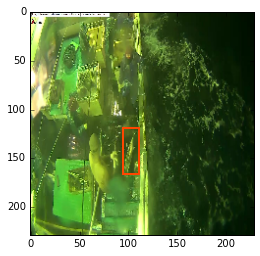

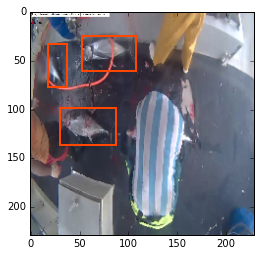

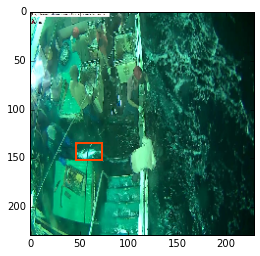

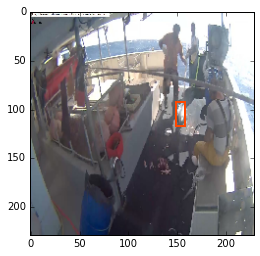

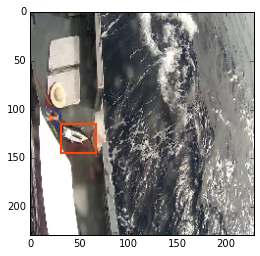

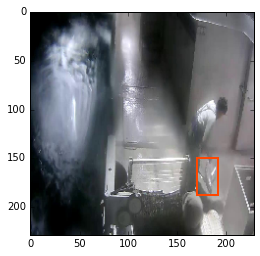

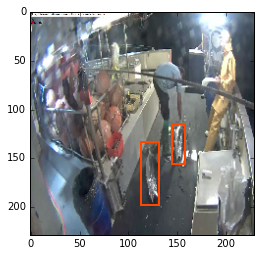

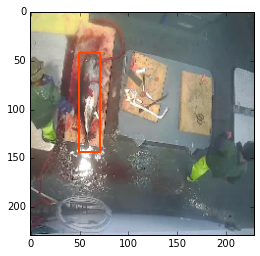

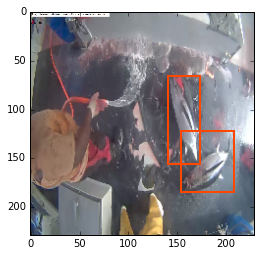

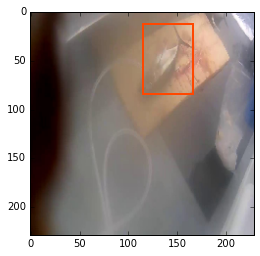

In [72]:
ind = 1
label_file = label_files[ind]
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()


with open(label_file, 'r') as f:
    label_json = json.load(f)

# for i in range(len(label_json)):
#     rect_lst = label_json[i]["annotations"]
#     filename = label_json[i]["filename"]
#     file_path = data_dirs[ind] + filename.split("/")[-1]
#     img = Image.open(file_path)
#     width, height = img.width, img.height
#     for rect in rect_lst:
#         _x, _y, _width, _height = rect['x'], rect['y'], rect['width'], rect['height']
#         rect['x'], rect['y'], rect['width'], rect['height'] = _x/width, _y/height, _width/width, _height/height

width, height = 229, 229        
for index in random.sample(range(len(label_json)), 10):
    rect_lst = label_json[index]["annotations"]
    filename = label_json[index]["filename"]
    file_path = data_dirs[ind] + filename.split("/")[-1]
    img = Image.open(file_path)
    img = img.resize((width, height))
    plt.figure()
    plt.imshow(img)
    currentAxis = plt.gca()
    j = 0
    for rect in rect_lst:
        _x, _y, _width, _height = rect['x'], rect['y'], rect['width'], rect['height']
        coords = (_x*width, _y*height), _width*width, _height*height
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=colors[ind], linewidth=2))
        j += 1


In [4]:
from PIL import Image 

In [26]:
img = Image.open('./input/train/ALB/img_00003.jpg')

In [3]:
# generate label json
import json
for ind in range(len(label_files)): 
    label_file = label_files[ind]
    with open(label_file, 'r') as f:
        label_json = json.load(f)
    for i in range(len(label_json)):
        rect_lst = label_json[i]["annotations"]
        filename = label_json[i]["filename"]
        label_json[i]["filename"] = filename.split("/")[-1]
        file_path = data_dirs[ind] + filename.split("/")[-1]
        img = Image.open(file_path)
        width, height = img.width, img.height
        rect_lst_new = []
        for rect in rect_lst:
            _x, _y, _width, _height = rect['x'], rect['y'], rect['width'], rect['height']
            rect_new = dict()
            rect_new['x_min'], rect_new['y_min'], rect_new['x_max'], rect_new['y_max'] = _x/width, _y/height, (_x+_width)/width, (_y+_height)/height
            rect_lst_new.append(rect_new)
        label_json[i]["annotations"] = rect_lst_new
    with open(label_file, 'w') as f:
            json.dump(label_json, f)

In [3]:
import json
for ind in range(1): 
    label_file = label_files[ind]
    with open(label_file, 'r') as f:
        label_json = json.load(f)
    for i in range(len(label_json)):
        rect_lst = label_json[i]["annotations"]
        filename = label_json[i]["filename"]
        label_json[i]["filename"] = filename.split("/")[-1]
        file_path = data_dirs[ind] + filename.split("/")[-1]
        img = Image.open(file_path)
        width, height = img.width, img.height
        rect_lst_new = []
        for rect in rect_lst:
            _x, _y, _width, _height = rect['x'], rect['y'], rect['width'], rect['height']
            rect_new = dict()
            rect_new['x_min'], rect_new['y_min'], rect_new['x_max'], rect_new['y_max'] = _x/width, _y/height, (_x+_width)/width, (_y+_height)/height
            rect_lst_new.append(rect_new)
        label_json[i]["annotations"] = rect_lst_new

33

In [10]:
bbox_json = label_json[0]['annotations']
bbox_lst = [[bbox['y_min'], bbox['x_min'], bbox['y_max'],bbox['y_max']] for bbox in bbox_json]
bbox_np = np.array(bbox_lst)

In [21]:
bbox_lst[:][0]

[0.0003125, 0.0003125, 0.0004841820987654321, 0.0004841820987654321]

In [19]:
np.array(0, dtype=np.float64)

array(0.0)